Sea $X$ una variable aleatoria con distribución normal y $h(t)=I_{[3,\infty)}(t)$ la función característica del intervalo $[3,\infty)$. Entonces, si se considera una secuencia $X_i\sim N(0,1)$ de variables aleatorias independientes, se tiene que $h(X_1), h(X_2), \ldots$ son variables aleatorias independientes e idénticamente distribuidas, con media igual a $E[g(X)]$, por la Ley Fuerte de los Grandes Números, se tiene que:
$$E[h(X)]\simeq \lim_{n\rightarrow\infty}\frac{1}{n}\sum_{i=1}^{n}h(X_i)$$

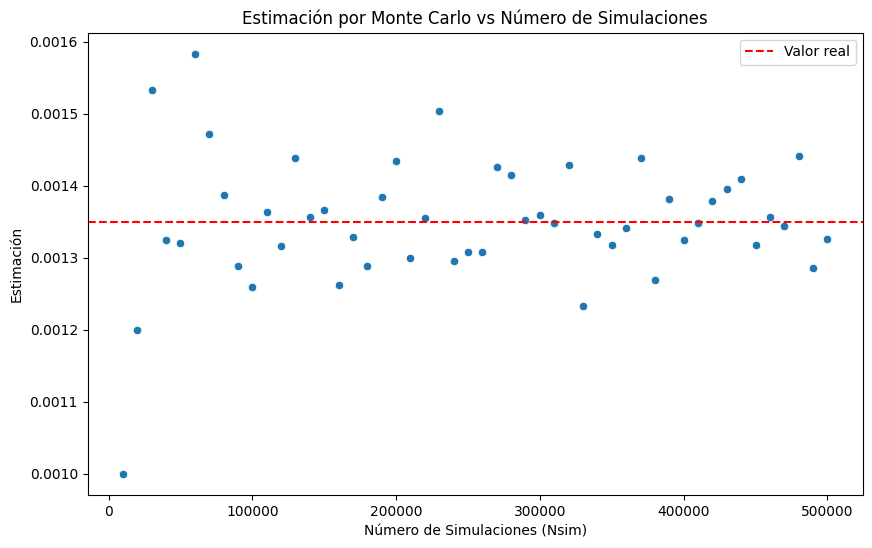

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

def monteCarlo(n):
    estimacion = 0
    for _ in range(n):
        X = np.random.normal(0, 1)
        estimacion += (X > 3)
    return round(estimacion/n, 7)

estimacion = []
nsim = []

for i in range(50):
    nsim.append((i+1)*10000)

# Calcula los 50 valores de Nsim
for n in nsim:
    estimacion.append(monteCarlo(n))

# Ordena las listas
desordenado = list(zip(nsim, estimacion))
ordenado = sorted(desordenado)
nsim, estimacion = zip(*ordenado)
nsim = list(nsim)
estimacion = list(estimacion)

# Crea un DataFrame con los valores de Nsim y la estimación
d = {'Nsim': nsim, 'Estimacion': estimacion}
df = pd.DataFrame(data=d)

# Crea el gráfico de dispersión
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Nsim', y='Estimacion', data=df)

# Agrega una línea recta horizontal en el valor real (y=0.0013499)
plt.axhline(y=0.0013499, color='r', linestyle='--', label='Valor real')

# Agrega títulos y etiquetas
plt.title('Estimación por Monte Carlo vs Número de Simulaciones')
plt.xlabel('Número de Simulaciones (Nsim)')
plt.ylabel('Estimación')

# Mostra la leyenda
plt.legend()

# Mostra el gráfico
plt.show()

Siguiendo con la idea del ejercicio anterior,

$$E[h(X)]\simeq \lim_{n\rightarrow\infty}\frac{1}{n}\sum_{i=1}^{n}
\frac{h(Y_i)f_X(Y_i)}{g_Y(Y_i)}
$$

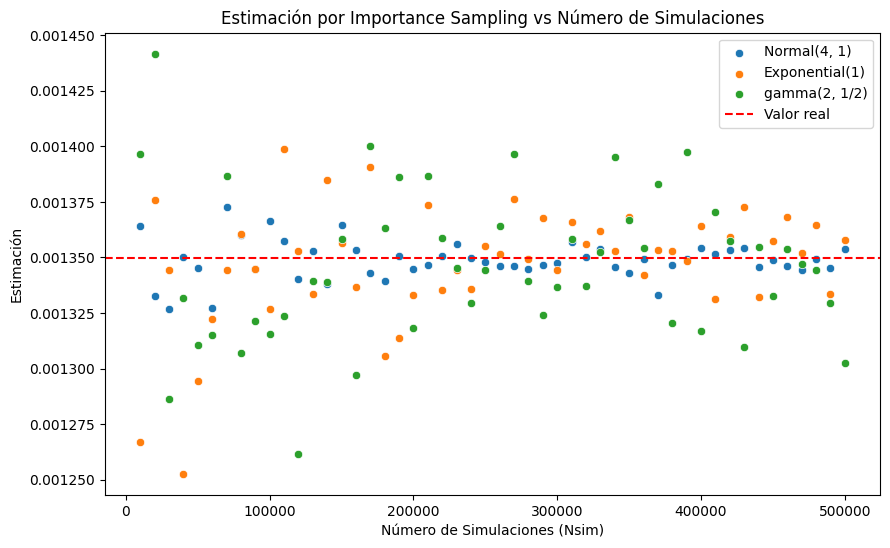

In [25]:
from math import sqrt, pi

def ImportanceSampling(n, generarY, distribucionY):
    estimacion = 0
    const = 1/sqrt(2*pi)
    for _ in range(n):
        Y = generarY()
        h = (Y > 3)
        f = const * np.exp(-Y**2 / 2)
        g = distribucionY(Y)
        estimacion += h * f / g
    return round(estimacion/n, 7)

# Generadores de las 3 funciones
def generarY1():
    return np.random.normal(4, 1)

def generarY2():
    return np.random.exponential(1)

def generarY3():
    return np.random.gamma(2, 1/2)

# Distribuciones de las 3 funciones
def distribucionY1(y): # Normal(4, 1)
    return 1/sqrt(2*pi) * np.exp(-(y-4)**2 / 2)

def distribucionY2(y): # Exponential(1)
    return np.exp(-y) if y > 0 else 0

def distribucionY3(y): # gamma(2, 1/2)
    return 4 * y * np.exp(-2 * y)

generarY = [generarY1, generarY2, generarY3]
distribucionY = [distribucionY1, distribucionY2, distribucionY3]
df = [0] * 3

# Calcula los valores de Nsim
nsim = []
for j in range(50):
    nsim.append((j+1)*10000)

for i in range(3):
    estimacion = []
    nsim1 = nsim

    # Calcula los 50 valores de Nsim
    for n in nsim1:
        estimacion.append(ImportanceSampling(n, generarY[i], distribucionY[i]))

    # Ordena las listas
    desordenado = list(zip(nsim1, estimacion))
    ordenado = sorted(desordenado)
    nsim1, estimacion = zip(*ordenado)
    nsim1 = list(nsim1)
    estimacion = list(estimacion)

    # Crea un DataFrame con los valores de Nsim y la estimación
    d1 = {'Nsim': nsim1, 'Estimacion': estimacion}
    df[i] = pd.DataFrame(data=d1)

# Crea el gráfico de dispersión
plt.figure(figsize=(10, 6))

sns.scatterplot(x='Nsim', y='Estimacion', data=df[0], label='Normal(4, 1)')
sns.scatterplot(x='Nsim', y='Estimacion', data=df[1], label='Exponential(1)')
sns.scatterplot(x='Nsim', y='Estimacion', data=df[2], label='gamma(2, 1/2)')

# Agrega una línea recta horizontal en el valor real (y=0.0013499)
plt.axhline(y=0.0013499, color='r', linestyle='--', label='Valor real')

# Agrega títulos y etiquetas
plt.title('Estimación por Importance Sampling vs Número de Simulaciones')
plt.xlabel('Número de Simulaciones (Nsim)')
plt.ylabel('Estimación')

# Mostra la leyenda
plt.legend()

# Mostra el gráfico
plt.show()
